# **CROP PREDICTION**

In [ ]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('Crop.csv')

# display the first 5 rows
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# Checking for null values
data.isna().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


# **EXPLORATORY DATA ANALYSIS**

<Axes: >

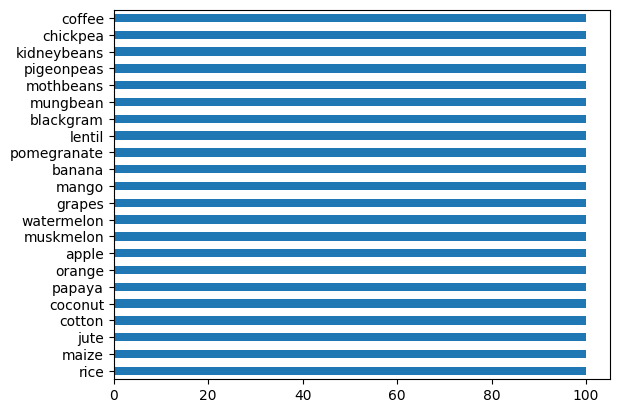

In [ ]:
data['label'].value_counts().plot(kind="barh")

In [ ]:
labels = data['label'].unique()
print(labels)


['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


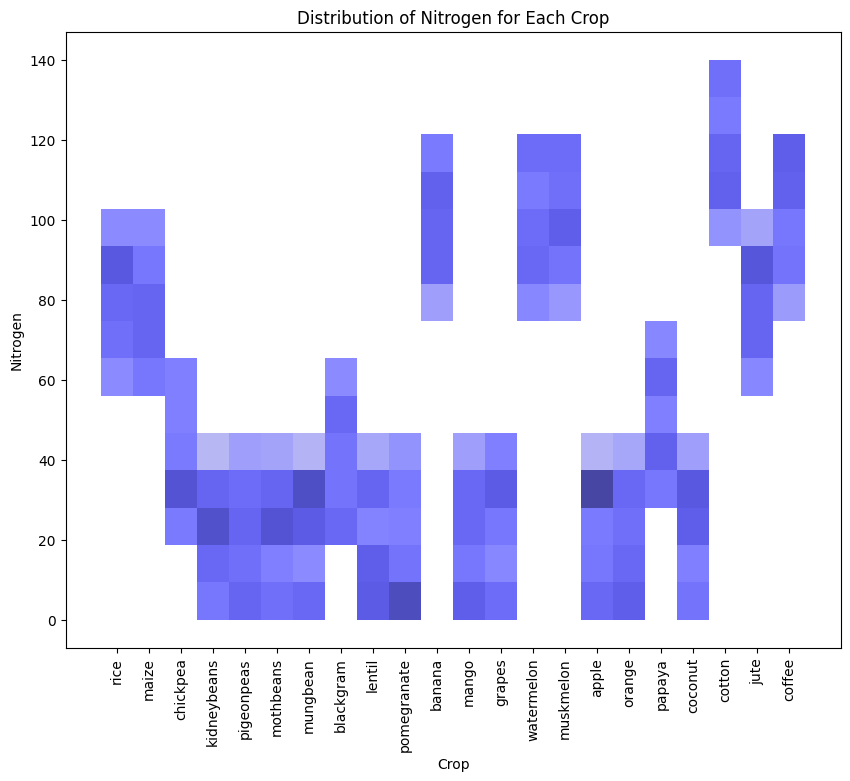

In [ ]:
#  hist plot
plt.figure(figsize=(10, 8))
sns.histplot(x='label', y='N', data=data,color='b')
plt.xlabel('Crop')
plt.ylabel('Nitrogen')
plt.title('Distribution of Nitrogen for Each Crop')
plt.xticks(rotation=90)
plt.show()

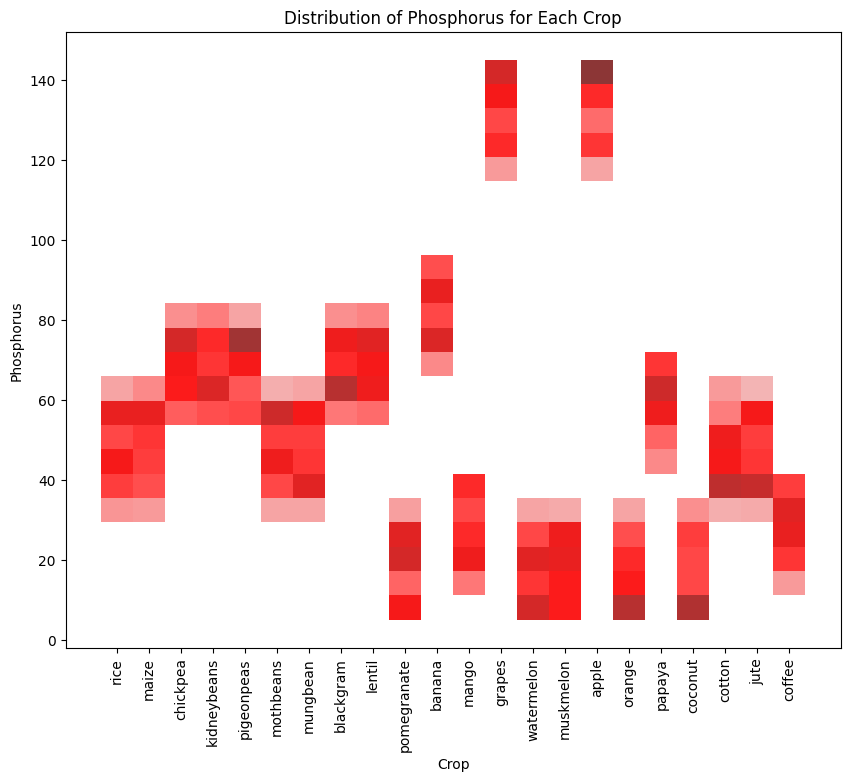

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x='label', y='P', data=data,color='r')
plt.xlabel('Crop')
plt.ylabel('Phosphorus')
plt.title('Distribution of Phosphorus for Each Crop')
plt.xticks(rotation=90)
plt.show()

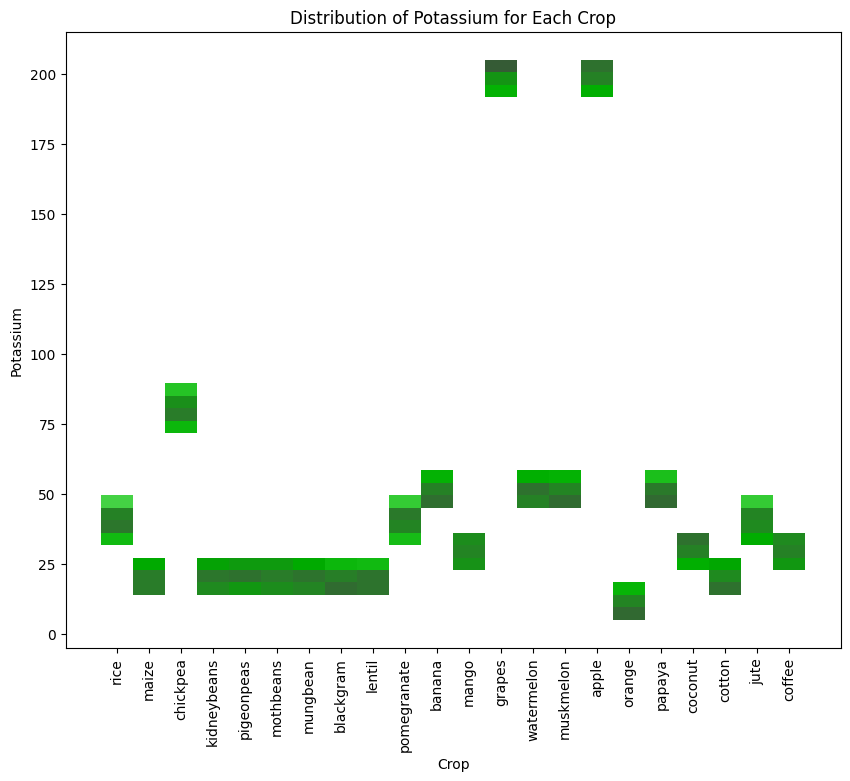

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x='label', y='K', data=data,color='g')
plt.xlabel('Crop')
plt.ylabel('Potassium')
plt.title('Distribution of Potassium for Each Crop')
plt.xticks(rotation=90)
plt.show()

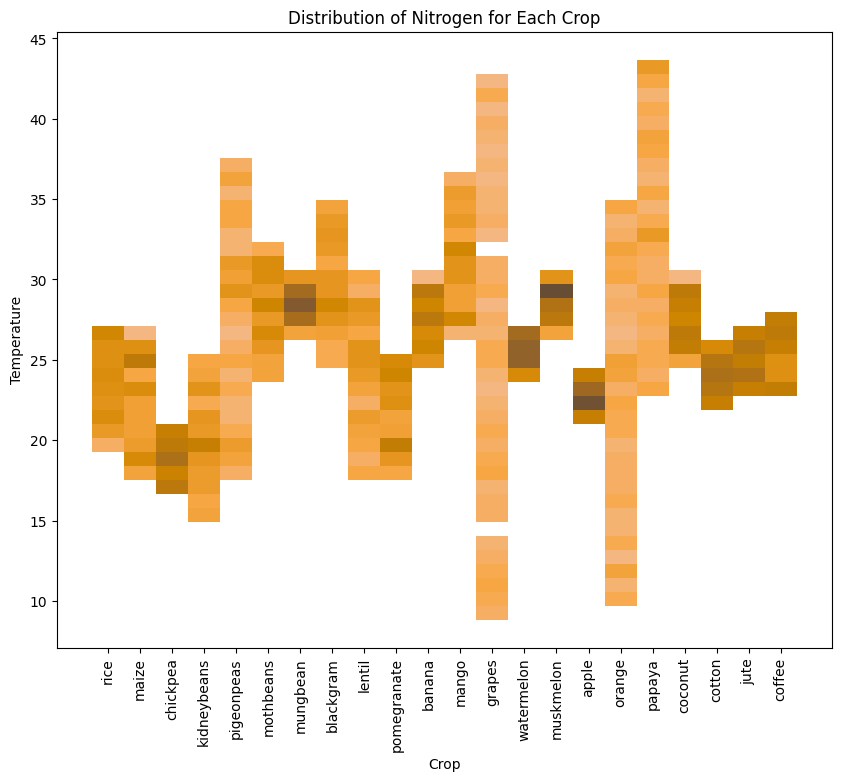

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x='label', y='temperature', data=data,color='orange')
plt.xlabel('Crop')
plt.ylabel('Temperature')
plt.title('Distribution of Nitrogen for Each Crop')
plt.xticks(rotation=90)
plt.show()


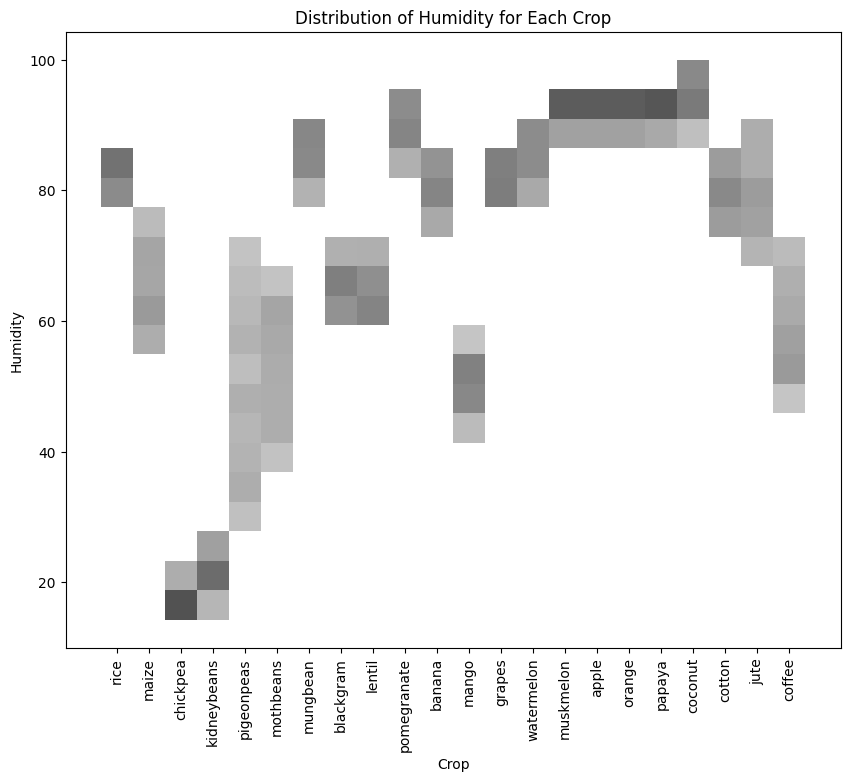

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x='label', y='humidity', data=data,color='black')
plt.xlabel('Crop')
plt.ylabel('Humidity')
plt.title('Distribution of Humidity for Each Crop')
plt.xticks(rotation=90)
plt.show()

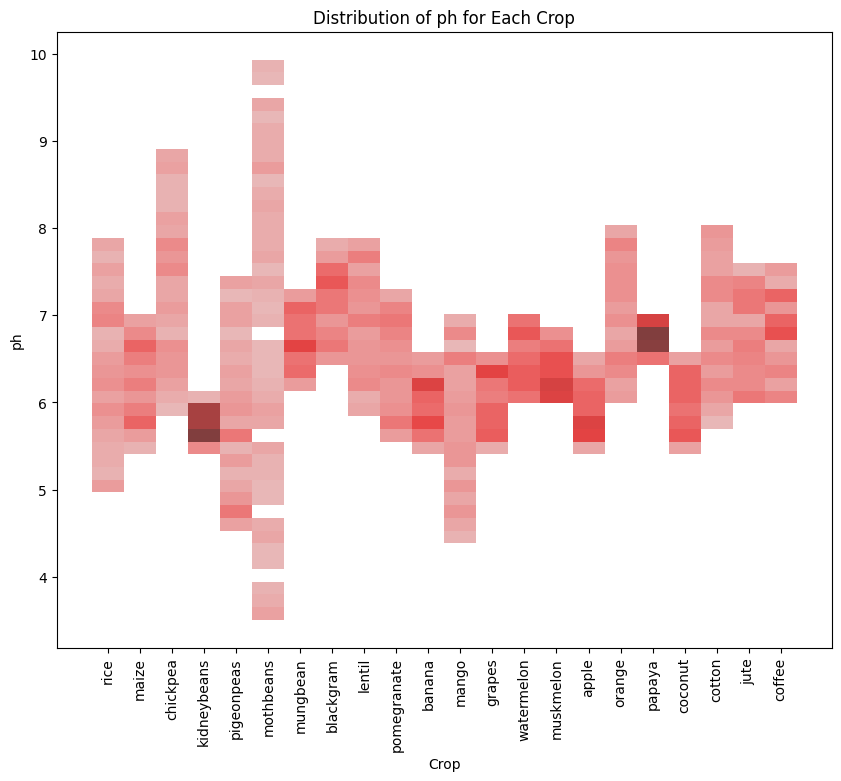

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x='label', y='ph', data=data,color='brown')
plt.xlabel('Crop')
plt.ylabel('ph')
plt.title('Distribution of ph for Each Crop')
plt.xticks(rotation=90)
plt.show()

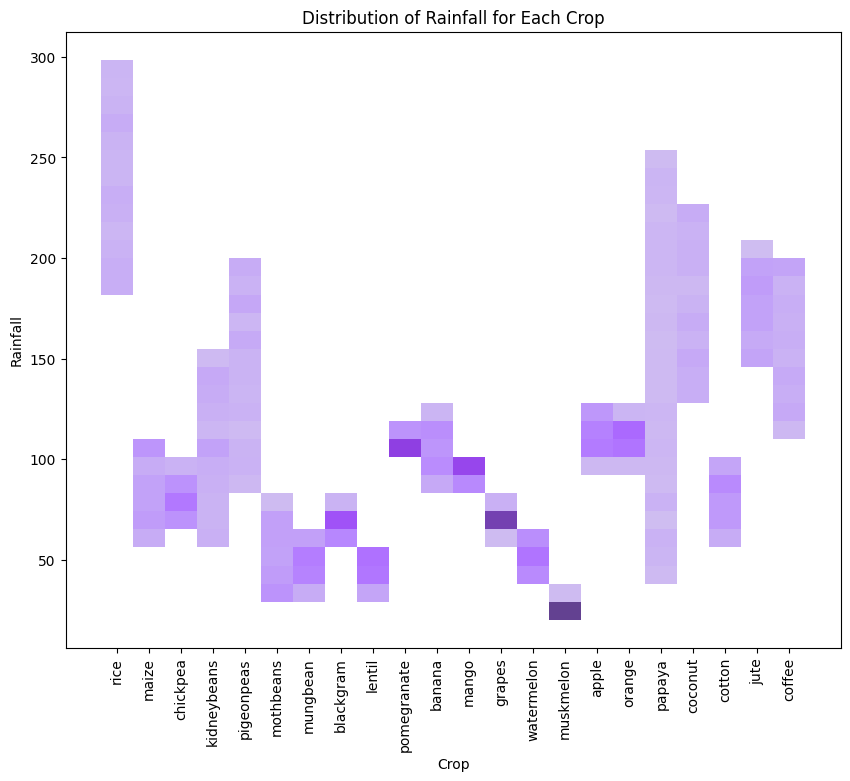

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x='label', y='rainfall', data=data,color='indigo')
plt.xlabel('Crop')
plt.ylabel('Rainfall')
plt.title('Distribution of Rainfall for Each Crop')
plt.xticks(rotation=90)
plt.show()

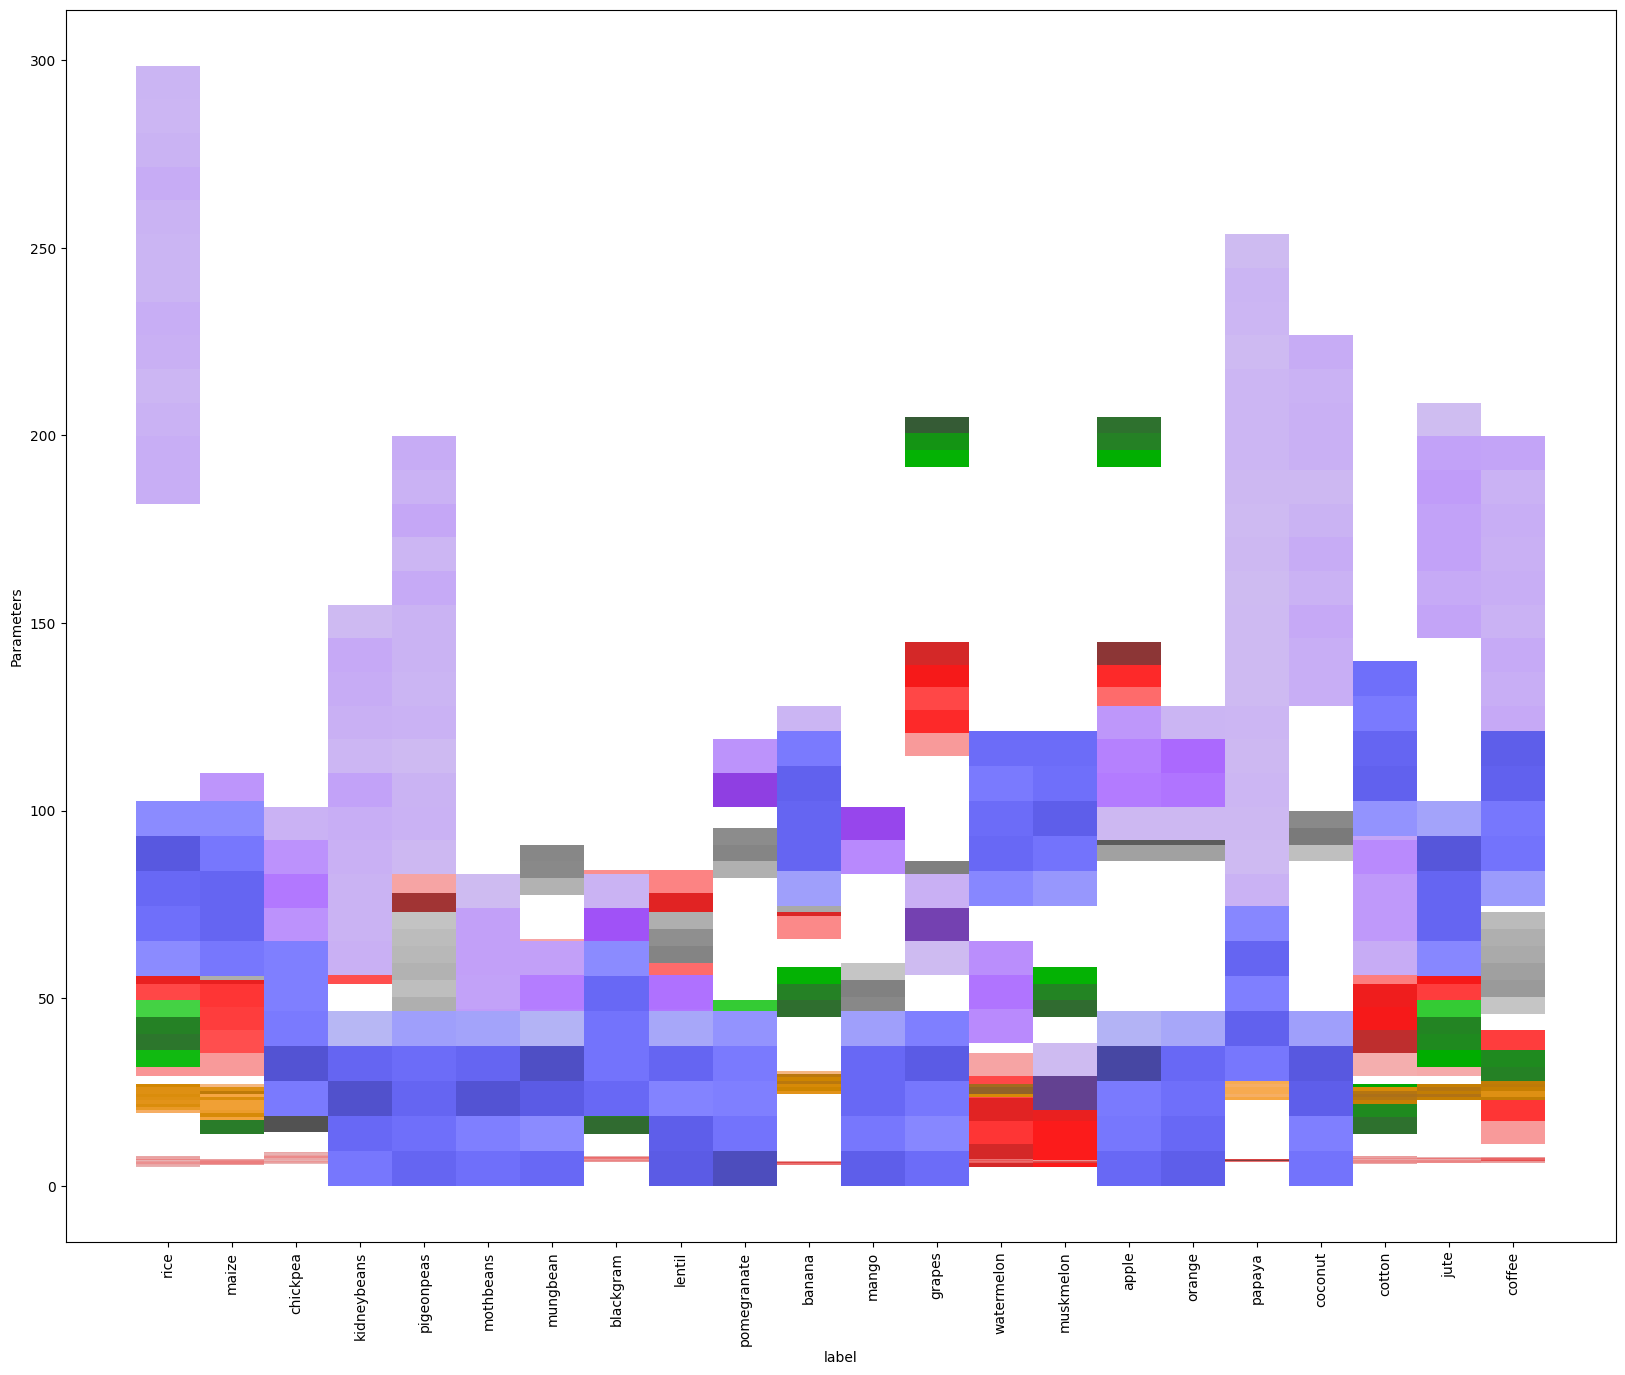

In [ ]:
plt.figure(figsize=(20, 16))
plt.ylabel('Parameters')
#sns.histplot(x='label', y='N', data=data,color='b')
sns.histplot(x='label', y='P', data=data,color='r')
sns.histplot(x='label', y='K', data=data,color='g')
sns.histplot(x='label', y='temperature', data=data,color='orange')
sns.histplot(x='label', y='humidity', data=data,color='black')
sns.histplot(x='label', y='ph', data=data,color='brown')
sns.histplot(x='label', y='rainfall', data=data,color='indigo')
sns.histplot(x='label', y='N', data=data,color='b')
plt.xticks(rotation=90)

plt.show()

# **MODELING**



In [ ]:
from sklearn.model_selection import train_test_split


**SPLITING TRAIN AND TEST**

In [ ]:
X = data[['N','P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

In [ ]:
#test_size=0.2 means 20% testing and 80% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **1.LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegressiona

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

In [ ]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9454545454545454


## **2.NAIVE BAYES**

In [ ]:
#Naive  bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

In [ ]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9954545454545455


## **3.K-NEAREST NEIGHBORS**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(5)
model.fit(X_train,y_train)

In [ ]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9704545454545455


## **ACCURACY COMPARISON**

In [ ]:
algorithms = [ LogisticRegression(), GaussianNB(),KNeighborsClassifier()]
algorithm_names = ['Logistic Regression', 'Naive Bayes','k-nearestneighbors']

In [ ]:
accuracies = []

for algorithm in algorithms:
    algorithm.fit(X_train, y_train)
    accuracy = algorithm.score(X_test, y_test)
    accuracies.append(accuracy)

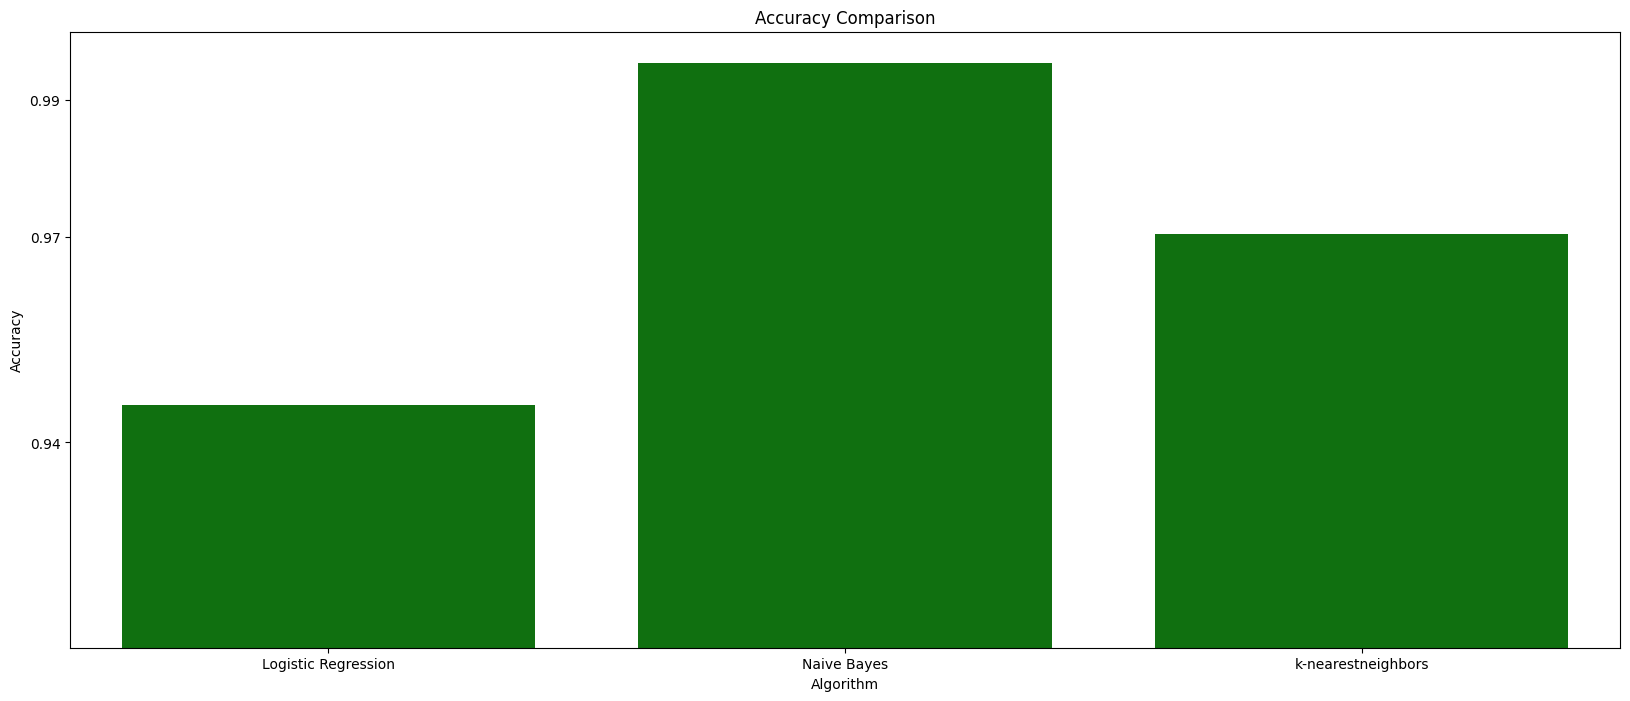

In [ ]:
plt.figure(figsize=[20,8])
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(y = accuracies,x = algorithm_names,color='g')
plt.xticks(rotation=0)
plt.yticks([0, 0.94 , 0.97 , 0.99 ])
plt.ylim(0.91,1)



plt.show()
